In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
df = pd.read_csv("cuisines.csv")

In [ ]:
print(df.describe())
print('***')
print(df.info())
print('***')
print(df.isnull().sum())
print(df.isna().sum())

In [4]:
df.columns

Index(['Unnamed: 0', 'cuisine', 'almond', 'angelica', 'anise', 'anise_seed',
       'apple', 'apple_brandy', 'apricot', 'armagnac',
       ...
       'whiskey', 'white_bread', 'white_wine', 'whole_grain_wheat_flour',
       'wine', 'wood', 'yam', 'yeast', 'yogurt', 'zucchini'],
      dtype='object', length=385)

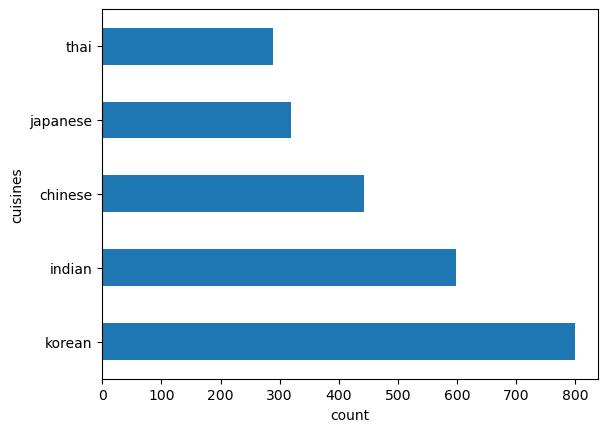

In [5]:
df.cuisine.value_counts().plot.barh()
plt.xlabel("count")
plt.ylabel("cuisines")
plt.show()

In [3]:
ingredients = df.drop(['Unnamed: 0','cuisine'], axis=1)

In [4]:
print(ingredients.columns)
print(len(ingredients.columns))

Index(['almond', 'angelica', 'anise', 'anise_seed', 'apple', 'apple_brandy',
       'apricot', 'armagnac', 'artemisia', 'artichoke',
       ...
       'whiskey', 'white_bread', 'white_wine', 'whole_grain_wheat_flour',
       'wine', 'wood', 'yam', 'yeast', 'yogurt', 'zucchini'],
      dtype='object', length=383)
383


In [8]:
df[df['cuisine']=='thai']['garlic'].sum()

173

In [5]:
ingredients.sum(axis=0).to_frame('value').head()

,value
almond,45
angelica,0
anise,1
anise_seed,7
apple,34


In [6]:
# transpose the dataframe, and sum across each rows (axis = 1)
# check cell just above, it does the same thing
ingredients_df = ingredients.T.sum(axis=1).to_frame('value') # create a dataframe with total occurence of each ingredient.

In [7]:
ingredients_df.head(5)

,value
almond,45
angelica,0
anise,1
anise_seed,7
apple,34


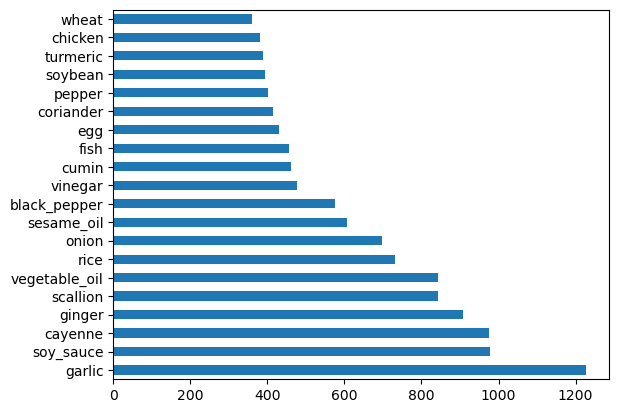

In [18]:
ingredients_df['value'].sort_values(ascending=False).head(20).plot(kind='barh')
plt.show()

In [19]:
#function to give ingredients and their counts in particular cuisine of choice

def ingredients_df(df,c='indian'):
    subdf = df[df['cuisine']==c]
    ingredients_df = subdf.drop(['Unnamed: 0','cuisine'], axis = 1)
    ingredients_df = ingredients_df.T.sum(axis=1).to_frame('value')
    ingredients_df = ingredients_df.sort_values(by='value', ascending=False,inplace=False)
    return ingredients_df


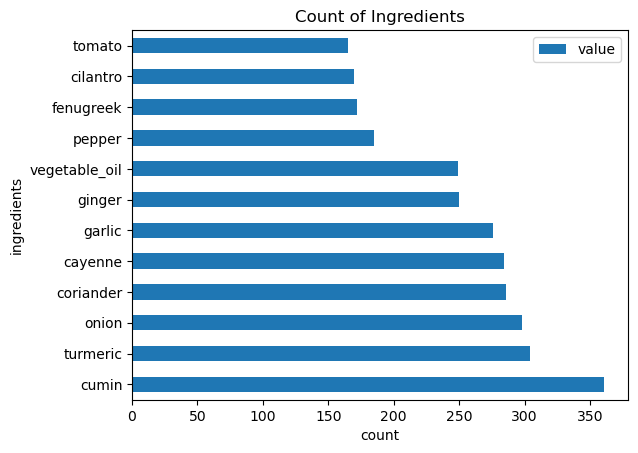

In [23]:
ingredients_df(df,'indian').head(12).plot(kind='barh')
plt.xlabel('count')
plt.ylabel('ingredients')
plt.title('Count of Ingredients')
plt.show()

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import SVC

In [25]:
X = df.drop(['Unnamed: 0', 'cuisine'], axis=1)
y = df['cuisine']
print(X.shape, y.shape)
print(X[:3], y[:3])

(2448, 383) (2448,)
   almond  angelica  anise  anise_seed  apple  apple_brandy  apricot  \
0       0         0      0           0      0             0        0   
1       1         0      0           0      0             0        0   
2       0         0      0           0      0             0        0   

   armagnac  artemisia  artichoke  ...  whiskey  white_bread  white_wine  \
0         0          0          0  ...        0            0           0   
1         0          0          0  ...        0            0           0   
2         0          0          0  ...        0            0           0   

   whole_grain_wheat_flour  wine  wood  yam  yeast  yogurt  zucchini  
0                        0     0     0    0      0       0         0  
1                        0     0     0    0      0       0         0  
2                        0     0     0    0      0       0         0  

[3 rows x 383 columns] 0    indian
1    indian
2    indian
Name: cuisine, dtype: object


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train.values,y_train.values)

predictions = lr_classifier.predict(X_test.values)
print(f"Accuracy on train: {lr_classifier.score(X_train.values, y_train.values):.2f}\nAccuracy on test:{lr_classifier.score(X_test.values, y_test.values):.2f} ")

Accuracy on train: 0.88
Accuracy on test:0.81 


In [36]:
print(X_test.iloc[5][X_test.iloc[5]!=0].keys())
print(y_test.iloc[5])

Index(['black_pepper', 'carrot', 'cayenne', 'chicken', 'coriander',
       'grape_juice', 'green_bell_pepper', 'lemon_juice', 'lettuce',
       'olive_oil', 'onion', 'oregano', 'radish', 'tabasco_pepper', 'tomato'],
      dtype='object')
indian


In [72]:
print(lr_classifier.predict(np.array(X_test.iloc[1]).reshape(1,-1)))
cuisines_prob = lr_classifier.predict_proba(np.array(X_test.iloc[1]).reshape(1,-1))


['korean']


In [73]:
classes = lr_classifier.classes_
# print(classes)
for i,c in enumerate(classes):
    print(c, "-->",round(cuisines_prob[0][i]*100,2),"%")

chinese --> 36.59 %
indian --> 3.41 %
japanese --> 6.58 %
korean --> 51.64 %
thai --> 1.78 %


In [82]:
# alternate way will be to create a dataframe with classes and probabilities

res_df = pd.DataFrame(data=cuisines_prob,columns=classes)
# print(res_df)
print("The prediction with probabilites for various cuisines:")
print(res_df.T.sort_values(by=[0],ascending=False))

The prediction with probabilites for various cuisines:
                 0
korean    0.516393
chinese   0.365923
japanese  0.065824
indian    0.034104
thai      0.017756


In [85]:
print("Classification report:")
print(classification_report(y_true=y_test, y_pred=predictions))

Classification report:
              precision    recall  f1-score   support

     chinese       0.67      0.61      0.64        90
      indian       0.94      0.96      0.95       122
    japanese       0.66      0.62      0.64        61
      korean       0.84      0.91      0.88       154
        thai       0.80      0.76      0.78        63

    accuracy                           0.81       490
   macro avg       0.78      0.77      0.78       490
weighted avg       0.81      0.81      0.81       490

